**Mid Exam Deep Learning**

Nama : Natasha Kayla Cahyadi

NIM : 2702235891

Kelas : LA09

# Libraries

In [1]:
import zipfile
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import random

from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
from tensorflow.keras import layers, models
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow import keras

# Data Preparation

In [131]:
zip_ref = zipfile.ZipFile("Dataset 2B.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [132]:
# Walk through directory and list number of files
for dirpath, dirnames, filenames in os.walk("train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 5 directories and 0 images in 'train'.
There are 0 directories and 1055 images in 'train\Doubtful'.
There are 0 directories and 1055 images in 'train\Mild'.
There are 0 directories and 1155 images in 'train\Moderate'.
There are 0 directories and 1055 images in 'train\Normal'.
There are 0 directories and 1055 images in 'train\Severe'.


In [133]:
# Walk through directory and list number of files
for dirpath, dirnames, filenames in os.walk("test"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 5 directories and 0 images in 'test'.
There are 0 directories and 117 images in 'test\Doubtful'.
There are 0 directories and 117 images in 'test\Mild'.
There are 0 directories and 117 images in 'test\Moderate'.
There are 0 directories and 118 images in 'test\Normal'.
There are 0 directories and 117 images in 'test\Severe'.


In [134]:
train_path= pathlib.Path("train")

class_names = np.array(sorted([item.name for item in train_path.glob('*')]))
print(class_names)

['Doubtful' 'Mild' 'Moderate' 'Normal' 'Severe']


In [135]:
test_path= pathlib.Path("test")

class_names = np.array(sorted([item.name for item in test_path.glob('*')]))
print(class_names)

['Doubtful' 'Mild' 'Moderate' 'Normal' 'Severe']


# Exploratory Data Analysis

In [7]:
import cv2

In [8]:
# Hitung jumlah gambar per kelas
def count_images_per_class(path):
    counts = {}
    for class_name in os.listdir(path):
        class_dir = os.path.join(path, class_name)
        counts[class_name] = len([f for f in os.listdir(class_dir) if f.endswith(".png")])
    return counts

In [9]:
train_counts = count_images_per_class(train_path)
test_counts = count_images_per_class(test_path)

## Image Distribution per Class

C:\Users\Kelvin Jonathan\AppData\Local\Temp\ipykernel_24296\198729652.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), palette=colors)


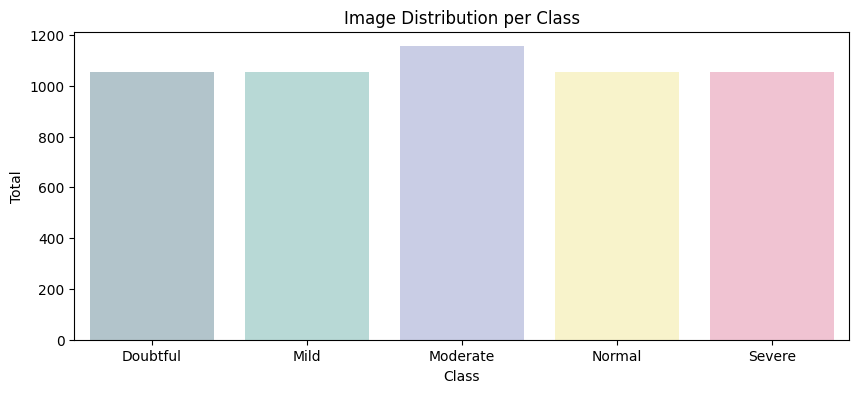

In [10]:
colors = ["#AEC6CF", "#B2DFDB", "#C5CAE9", "#FFF9C4", "#F8BBD0"]

plt.figure(figsize=(10, 4))
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), palette=colors)
plt.title("Image Distribution per Class")
plt.xlabel("Class")
plt.ylabel("Total")
plt.show()

Based on the plot above, it can be observed that all classes are relatively evenly distributed. The *Moderate* class has slightly more samples compared to the other classes, but the difference is not particularly significant.

## Variability

In [11]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+ target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

Image shape: (224, 224, 3)


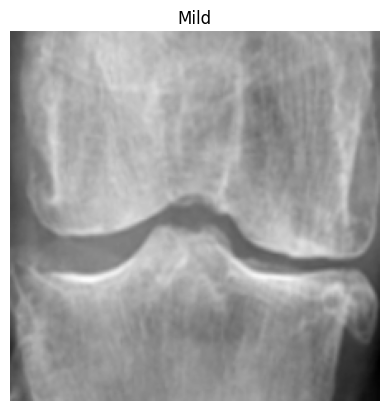

In [12]:
img= view_random_image(target_dir="train/",
                        target_class="Mild")

Image shape: (224, 224, 3)


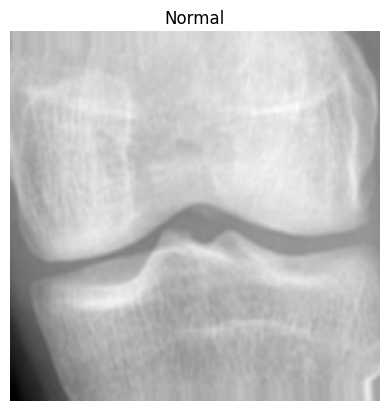

In [13]:
img= view_random_image(target_dir="train/",
                        target_class="Normal")

Image shape: (224, 224)


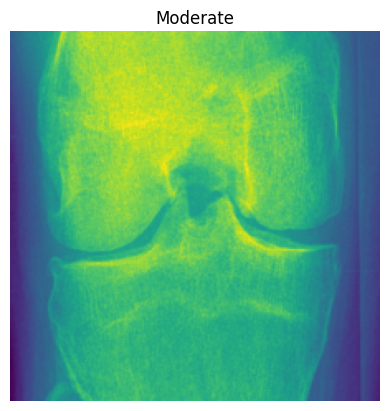

In [14]:
img= view_random_image(target_dir="train/",
                        target_class="Moderate")

Image shape: (224, 224, 3)


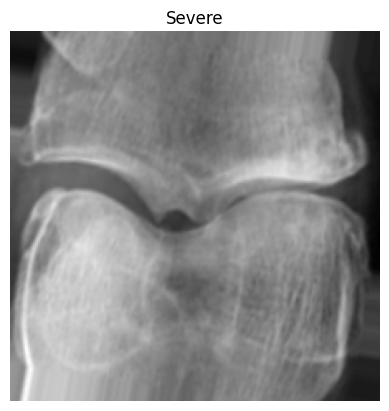

In [15]:
img= view_random_image(target_dir="train/",
                        target_class="Severe")

Image shape: (224, 224, 3)


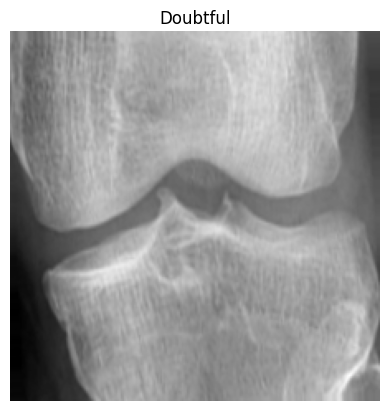

In [16]:
img= view_random_image(target_dir="train/",
                        target_class="Doubtful")

## RGB Histogram

In [17]:
base_path = 'test/'

data_dir= pathlib.Path("test/")
classes = np.array(sorted([item.name for item in data_dir.glob('*')]))

Class: Doubtful


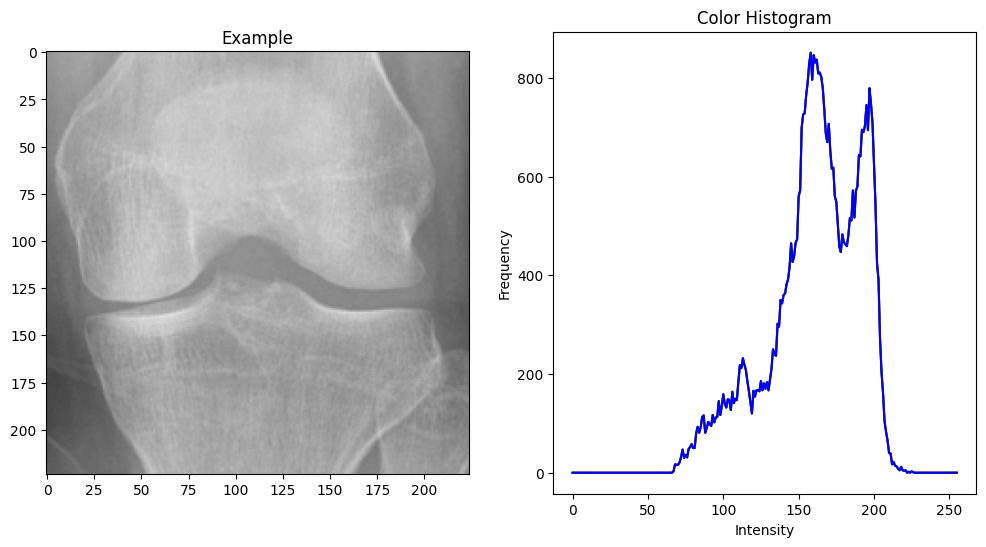

Class: Mild


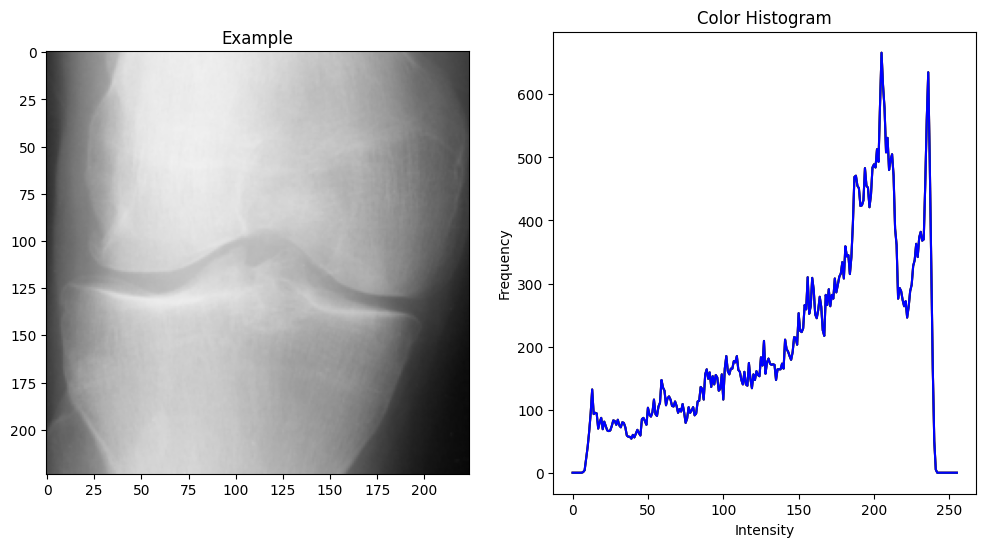

Class: Moderate


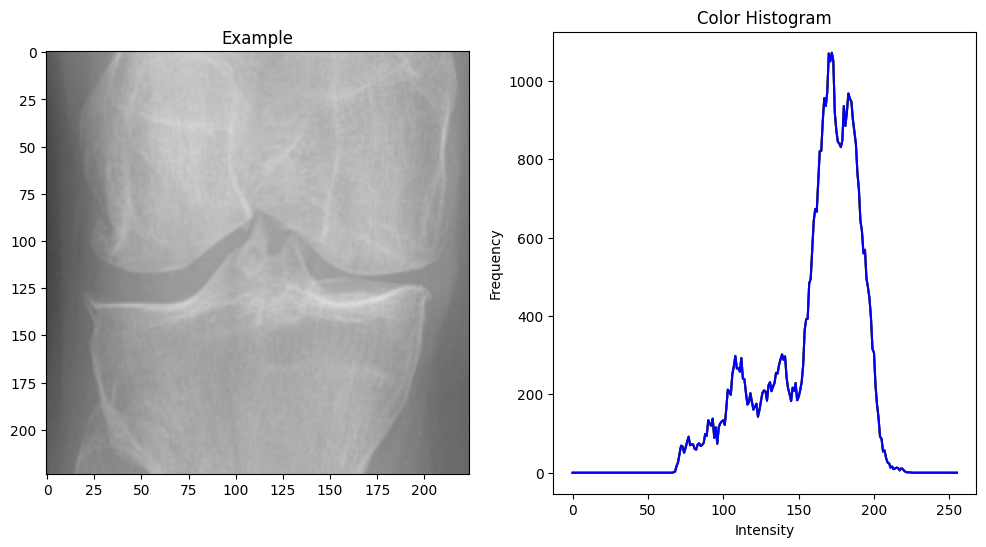

Class: Normal


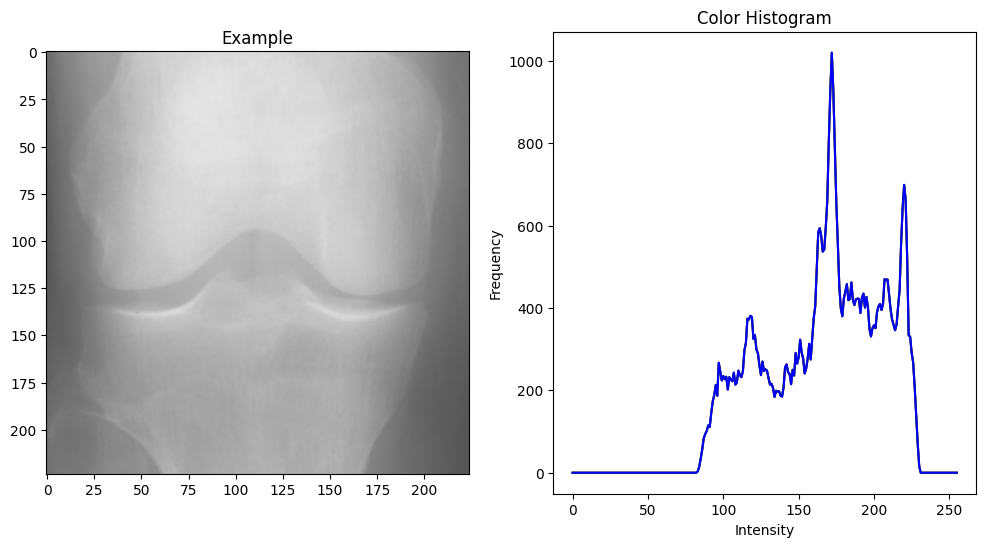

Class: Severe


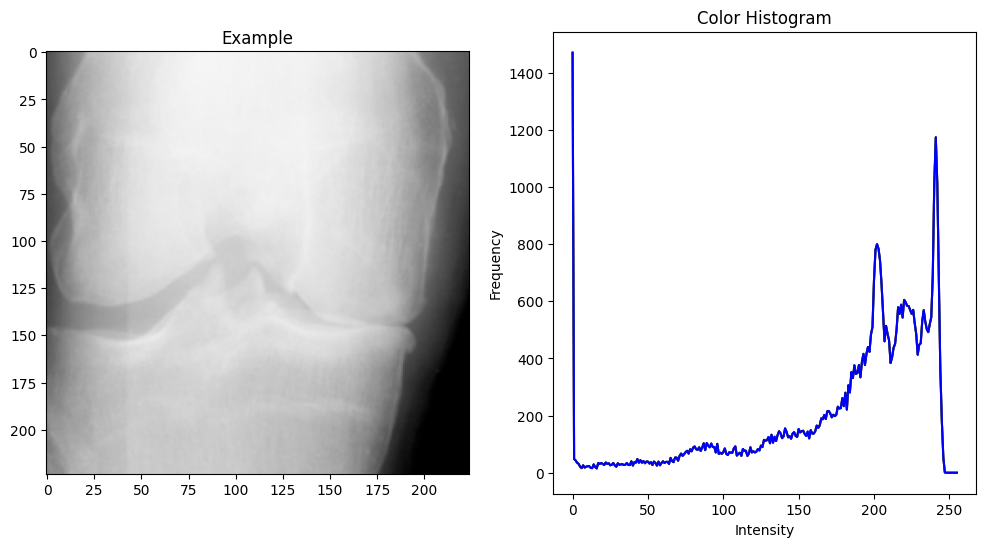

In [18]:
def plot_color_histogram(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Plot gambar
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Example')

    # Plot histogram
    plt.subplot(1, 2, 2)
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.title('Color Histogram')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.show()

for class_name in classes:
    img_path = os.path.join(base_path, class_name, os.listdir(os.path.join(base_path, class_name))[0])
    print(f"Class: {class_name}")
    plot_color_histogram(img_path)

It can be seen that the graphs for the *Doubtful*, *Mild*, *Moderate*, and *Normal* classes display pixel distributions dominated by bright to light gray areas (approaching white). In contrast, the graph for the *Severe* class shows that most pixels are concentrated in very dark areas. This is likely due to the presence of a dark background in the lower right corner or harsh shadows, which could potentially affect the performance of the model I developed.

## Aspect Ratio and Resolution Images

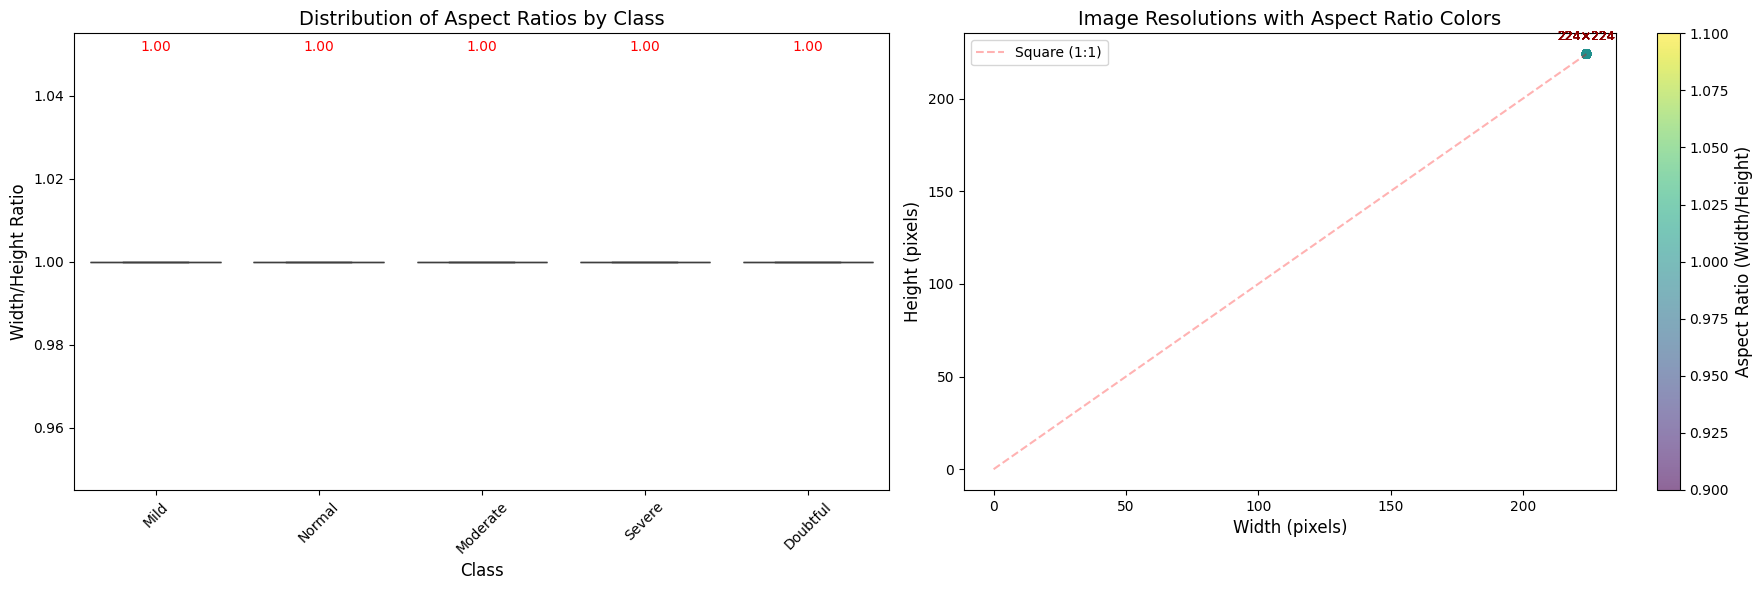


Resolution Statistics:
Min resolution: 50176 pixels
Max resolution: 50176 pixels
Median resolution: 50176 pixels

Aspect Ratio Statistics:
Min aspect ratio: 1.00
Max aspect ratio: 1.00
Median aspect ratio: 1.00


In [19]:
# Set paths and classes (same as before)
train_dir = 'train'
classes = ['Mild', 'Normal', 'Moderate', 'Severe', 'Doubtful']

# Initialize lists and analyze images (same as before)
aspect_ratios = []
resolutions = []
widths = []
heights = []
class_labels = []

for class_name in classes:
    class_path = os.path.join(train_dir, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            height, width = img.shape[:2]
            aspect_ratios.append(width / height)
            resolutions.append(width * height)
            widths.append(width)
            heights.append(height)
            class_labels.append(class_name)

# Create DataFrame
df_stats = pd.DataFrame({
    'width': widths,
    'height': heights,
    'aspect_ratio': aspect_ratios,
    'resolution': resolutions,
    'class': class_labels
})

# Create figure with two subplots
plt.figure(figsize=(18, 6))

# 1. Aspect Ratio Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='class', y='aspect_ratio', data=df_stats)
plt.title('Distribution of Aspect Ratios by Class', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Width/Height Ratio', fontsize=12)
plt.xticks(rotation=45)

# Add mean value annotations
for i, class_name in enumerate(classes):
    mean_val = df_stats[df_stats['class'] == class_name]['aspect_ratio'].mean()
    plt.text(i, mean_val + 0.05, f'{mean_val:.2f}',
             ha='center', va='bottom', fontsize=10, color='red')

# 2. Resolution Scatter Plot with Annotations
plt.subplot(1, 2, 2)
scatter = plt.scatter(df_stats['width'], df_stats['height'],
                     c=df_stats['aspect_ratio'], cmap='viridis', alpha=0.6)
plt.title('Image Resolutions with Aspect Ratio Colors', fontsize=14)
plt.xlabel('Width (pixels)', fontsize=12)
plt.ylabel('Height (pixels)', fontsize=12)

# Add colorbar for aspect ratio
cbar = plt.colorbar(scatter)
cbar.set_label('Aspect Ratio (Width/Height)', fontsize=12)

# Annotate some points with their resolutions
# We'll annotate points that are furthest from the diagonal to show variety
df_stats['diagonal_dist'] = abs(df_stats['width'] - df_stats['height'])
sample_points = df_stats.nlargest(15, 'diagonal_dist')

for _, row in sample_points.iterrows():
    plt.annotate(f"{row['width']}×{row['height']}",
                (row['width'], row['height']),
                textcoords="offset points",
                xytext=(0,10),
                ha='center',
                fontsize=9,
                color='darkred')

# Add reference lines
max_dim = max(df_stats['width'].max(), df_stats['height'].max())
plt.plot([0, max_dim], [0, max_dim], 'r--', alpha=0.3, label='Square (1:1)')
plt.legend()

plt.tight_layout()
plt.show()

# Print some statistics
print("\nResolution Statistics:")
print(f"Min resolution: {df_stats['resolution'].min()} pixels")
print(f"Max resolution: {df_stats['resolution'].max()} pixels")
print(f"Median resolution: {df_stats['resolution'].median():.0f} pixels")
print("\nAspect Ratio Statistics:")
print(f"Min aspect ratio: {df_stats['aspect_ratio'].min():.2f}")
print(f"Max aspect ratio: {df_stats['aspect_ratio'].max():.2f}")
print(f"Median aspect ratio: {df_stats['aspect_ratio'].median():.2f}")

All images in the dataset have a uniform size, most likely 224×224 pixels, and are square in shape (equal height and width). Therefore, the data is already in a ready-to-process state without requiring additional steps such as resizing or cropping.

# Data Splitting

In [136]:
# Set paths
train_dir = 'train'  # Your original training data directory
test_dir = 'test'    # Your original test data directory
classes = ['Mild', 'Normal', 'Moderate', 'Severe', 'Doubtful']

# First, let's create proper train/val/test splits

# 1. Create new directory structure
import shutil
from tqdm import tqdm

base_dir = 'osteoporosis_splits'
os.makedirs(base_dir, exist_ok=True)

train_dir_new = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir_new = os.path.join(base_dir, 'test')

# Create class subdirectories
for split in [train_dir_new, val_dir, test_dir_new]:
    for cls in classes:
        os.makedirs(os.path.join(split, cls), exist_ok=True)

# 2. Split the original training data into train/val (85%/15%)
for cls in classes:
    # Get all image files for this class
    src_dir = os.path.join(train_dir, cls)
    files = [f for f in os.listdir(src_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Split into train and val
    train_files, val_files = train_test_split(files, test_size=0.15, random_state=42)

    # Copy files to new directories
    for f in tqdm(train_files, desc=f'Copying {cls} train'):
        src = os.path.join(src_dir, f)
        dst = os.path.join(train_dir_new, cls, f)
        shutil.copy(src, dst)

    for f in tqdm(val_files, desc=f'Copying {cls} val'):
        src = os.path.join(src_dir, f)
        dst = os.path.join(val_dir, cls, f)
        shutil.copy(src, dst)


Copying Mild train:   0%|          | 0/896 [00:00<?, ?it/s]

Copying Doubtful val: 100%|██████████| 159/159 [00:00<00:00, 966.95it/s] 


In [137]:
# 3. Copy test files (unchanged)
for cls in classes:
    src_dir = os.path.join(test_dir, cls)
    files = [f for f in os.listdir(src_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for f in tqdm(files, desc=f'Copying {cls} test'):
        src = os.path.join(src_dir, f)
        dst = os.path.join(test_dir_new, cls, f)
        shutil.copy(src, dst)

Copying Doubtful test: 100%|██████████| 117/117 [00:00<00:00, 915.68it/s]


# Data Preprocessing

## Augmentation

In [138]:
# 4. Create data generators with preprocessing
img_size = (224, 224)
batch_size = 32

# Training generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.9,1.1],
    fill_mode='constant'
)

# Validation and test generators (only rescaling)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir_new,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir_new,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

Found 4565 images belonging to 5 classes.
Found 810 images belonging to 5 classes.
Found 586 images belonging to 5 classes.


In this augmentation process, I normalized the image pixel values from the range \[0, 255] to \[0, 1] and applied several transformations, including horizontal shifts (left–right) of up to 10% of the image width, vertical shifts (top–bottom) of up to 10% of the image height, shearing distortion, zoom in and zoom out variations of up to ±10% of the original image size, and horizontal flipping. Additionally, the image brightness was randomly adjusted within the range of 90% to 110%.

In creating the generator, I used the parameter `class_mode='sparse'` to provide class labels in integer form rather than binary. This approach is expected to simplify and improve efficiency in the use of the loss function during training.

In [139]:
# Print class indices and counts
print("\nClass indices:", train_generator.class_indices)
print("Train samples:", train_generator.samples)
print("Validation samples:", val_generator.samples)
print("Test samples:", test_generator.samples)

# Verify the splits
def count_files(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len(files)
    return count

print("\nFinal split counts:")
print(f"Train: {count_files(train_dir_new)} images")
print(f"Validation: {count_files(val_dir)} images")
print(f"Test: {count_files(test_dir_new)} images")


Class indices: {'Doubtful': 0, 'Mild': 1, 'Moderate': 2, 'Normal': 3, 'Severe': 4}
Train samples: 4565
Validation samples: 810
Test samples: 586

Final split counts:
Train: 4565 images
Validation: 810 images
Test: 586 images


# Modelling

## Baseline Model

In [46]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def create_alexnet(input_shape=(224, 224, 3), num_classes=5):
    model = models.Sequential()
    
    # Layer 1: Conv 11x11, stride 4 → 54x54x96
    model.add(layers.Conv2D(96, (11, 11), strides=4, activation='relu', 
                           input_shape=input_shape, padding='valid'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))  # → 26x26x96
    
    # Layer 2: Conv 5x5, padding 2 → 26x26x256
    model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))  # → 12x12x256
    
    # Layer 3: Conv 3x3, padding 1 → 12x12x384
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    
    # Layer 4: Conv 3x3, padding 1 → 12x12x384
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    
    # Layer 5: Conv 3x3, padding 1 → 12x12x256
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))  # → 5x5x256
    
    # Flatten → 6400 neurons
    model.add(layers.Flatten())
    
    # FC6: 4096 neurons
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    
    # FC7: 4096 neurons
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    
    # Output: 5 neurons (bukan 1000 seperti aslinya)
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    return model

# Create model
model = create_alexnet(input_shape=(224, 224, 3), num_classes=5)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 26, 26, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 12, 12, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 12, 12, 384)       885120    
                                                                 
 conv2d_29 (Conv2D)          (None, 12, 12, 384)       1

In [47]:
# Compile model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size)

Epoch 1/10
142/142 [==============================] - 43s 270ms/step - loss: 1.6105 - accuracy: 0.2094 - val_loss: 1.6090 - val_accuracy: 0.1850
Epoch 2/10
142/142 [==============================] - 35s 245ms/step - loss: 1.6092 - accuracy: 0.2162 - val_loss: 1.6065 - val_accuracy: 0.2175
Epoch 3/10
142/142 [==============================] - 35s 246ms/step - loss: 1.6090 - accuracy: 0.2127 - val_loss: 1.6071 - val_accuracy: 0.2175
Epoch 4/10
142/142 [==============================] - 35s 244ms/step - loss: 1.6017 - accuracy: 0.2312 - val_loss: 1.5930 - val_accuracy: 0.2262
Epoch 5/10
142/142 [==============================] - 35s 245ms/step - loss: 1.5974 - accuracy: 0.2349 - val_loss: 1.5864 - val_accuracy: 0.2700
Epoch 6/10
142/142 [==============================] - 35s 246ms/step - loss: 1.5729 - accuracy: 0.2574 - val_loss: 1.5883 - val_accuracy: 0.2425
Epoch 7/10
142/142 [==============================] - 35s 245ms/step - loss: 1.5473 - accuracy: 0.2883 - val_loss: 1.5201 - val_ac

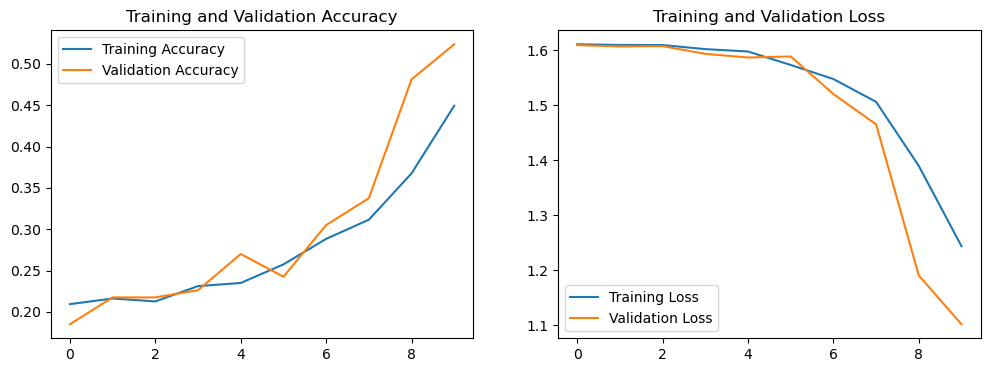

In [49]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Based on the two graphs above, it can be concluded that the model has not yet learned optimally (underfitting), as indicated by the accuracy and loss not reaching satisfactory performance. Although both training and validation accuracy show an upward trend as the number of epochs increases, the values remain relatively low, staying below 0.50.

There is a small gap between training and validation accuracy, indicating that the model is not experiencing significant overfitting.

Overall, the model’s performance is still poor, with a maximum accuracy of only around 50%, which is comparable to random guessing in binary classification. Nevertheless, the gradual decrease in loss over time suggests that the model is still attempting to learn patterns from the data.

The validation loss is indeed higher than the training loss, but the difference is not substantial. This could indicate slight overfitting or other possible issues, such as data imbalance or an overly simple model architecture.

The relatively high loss value at the end of training (above 1.1) is also consistent with the low accuracy achieved.

## Modified Model

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

def modified_model(input_shape=(224, 224, 3), num_classes=5):
    base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze base model (bisa nanti dibuka lagi untuk fine-tune)
    base_model.trainable = False

    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

In [141]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Build model
modified_model = modified_model(input_shape=(224, 224, 3), num_classes=5)

# Compile model
modified_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

modified_model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_4   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_20 (Dropout)        (None, 1280)              0         
                                                                 
 dense_17 (Dense)            (None, 128)               163968    
                                                              

In [142]:
callbacks_model = [
    EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
]

In [143]:
hist = modified_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=15,
    callbacks=callbacks_model
)

Epoch 1/15
142/142 [==============================] - 106s 714ms/step - loss: 1.4370 - accuracy: 0.3880 - val_loss: 1.2140 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 2/15
142/142 [==============================] - 99s 697ms/step - loss: 1.2403 - accuracy: 0.4633 - val_loss: 1.1178 - val_accuracy: 0.5387 - lr: 0.0010
Epoch 3/15
142/142 [==============================] - 99s 700ms/step - loss: 1.1892 - accuracy: 0.4902 - val_loss: 1.0734 - val_accuracy: 0.5288 - lr: 0.0010
Epoch 4/15
142/142 [==============================] - 89s 628ms/step - loss: 1.1685 - accuracy: 0.5063 - val_loss: 1.0489 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 5/15
142/142 [==============================] - 40s 280ms/step - loss: 1.1231 - accuracy: 0.5272 - val_loss: 1.0345 - val_accuracy: 0.5763 - lr: 0.0010
Epoch 6/15
142/142 [==============================] - 40s 283ms/step - loss: 1.0936 - accuracy: 0.5429 - val_loss: 1.0656 - val_accuracy: 0.5525 - lr: 0.0010
Epoch 7/15
142/142 [==============================]

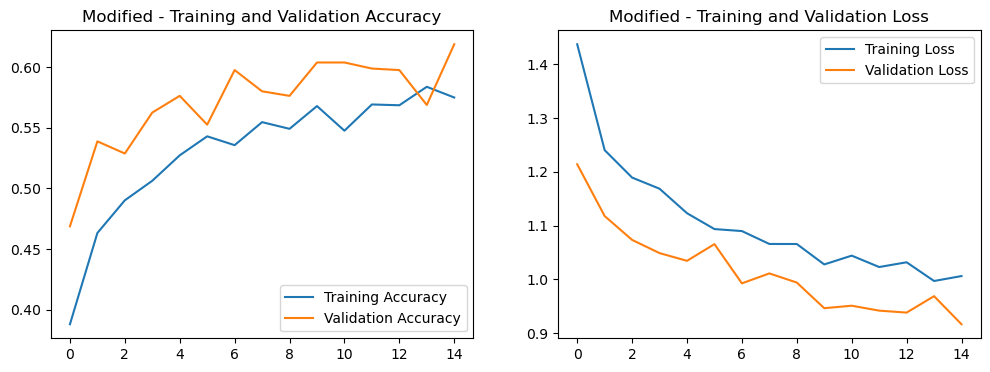

In [144]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Modified - Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Modified - Training and Validation Loss')
plt.legend()
plt.show()

The model’s performance shows a noticeable improvement, as indicated by the increase in accuracy from 0.50 to 0.60 and the decrease in loss from 1.6 to 0.9. This suggests that the model has learned the data more effectively compared to the previous state. However, there are signs of overfitting, evidenced by the emergence of a gap between training and validation accuracy, as well as an increase in validation loss toward the end of the training process.

# Evaluation

In [55]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

# Melakukan prediksi pada data testing
y_pred = model.predict(test_generator).argmax(axis=1)  # Ambil indeks kelas dengan prob tertinggi
y_true = test_generator.classes

print("\nClassification Report - Baseline Model :")
print(classification_report(y_true, y_pred, target_names=class_names))

19/19 [==============================] - 2s 71ms/step - loss: 1.3331 - accuracy: 0.4147
Test Accuracy: 0.414675772190094
Test Loss: 1.333104133605957
19/19 [==============================] - 1s 41ms/step

Classification Report - Baseline Model :
              precision    recall  f1-score   support

    Doubtful       0.31      0.36      0.33       117
        Mild       0.28      0.32      0.30       117
    Moderate       0.37      0.37      0.37       117
      Normal       0.40      0.28      0.33       118
      Severe       0.73      0.75      0.74       117

    accuracy                           0.41       586
   macro avg       0.42      0.41      0.41       586
weighted avg       0.42      0.41      0.41       586



**Detailed Classification Report**

**Accuracy:** 41% – The model correctly predicted only 41% of the total 586 samples, indicating poor overall performance.

**F1-Score (Macro):** 41% – No single class significantly boosted the score, suggesting that the model struggled equally across all classes.

**F1-Score (Weighted Avg):** 41% – No notable improvement even when class weights are considered.

---

**Doubtful:**

* **Precision:** 0.31 → Only 31% of “Doubtful” predictions were correct.
* **Recall:** 0.36 → Only 36% of actual “Doubtful” cases were detected.
* **F1-Score:** 0.33 → Low balance between precision and recall.
  **Conclusion:** The model frequently misclassified this class, resulting in many false positives and false negatives.

**Mild:**

* **Precision:** 0.28 → 28% of “Mild” predictions were correct.
* **Recall:** 0.32 → Only 32% of actual “Mild” cases were detected.
* **F1-Score:** 0.30 → Second-lowest performance among all classes.
  **Conclusion:** The model struggled to distinguish “Mild” from other classes.

**Moderate:**

* **Precision:** 0.37 → 37% of “Moderate” predictions were correct.
* **Recall:** 0.37 → 37% of actual “Moderate” cases were detected.
* **F1-Score:** 0.37 → Balanced but still low precision and recall.
  **Conclusion:** Consistently poor performance for this class.

**Normal:**

* **Precision:** 0.40 → 40% of “Normal” predictions were correct.
* **Recall:** 0.28 → Only 28% of actual “Normal” cases were detected.
* **F1-Score:** 0.33 → Low recall indicates many false negatives.
  **Conclusion:** The model often missed “Normal” cases, misclassifying them as “Moderate” or other classes.

**Severe:**

* **Precision:** 0.73 → 73% of “Severe” predictions were correct.
* **Recall:** 0.75 → 75% of actual “Severe” cases were detected.
* **F1-Score:** 0.74 → Best performance among all classes, though still with 25% error.
  **Conclusion:** The model handled this class relatively well, possibly due to more distinctive features.

---

**Analysis:**

* The best-performing class is **Severe**, with the highest F1-Score (0.74).
* The worst-performing class is **Mild**, with the lowest F1-Score (0.30).
* The model struggled to differentiate between visually similar classes, such as **Doubtful** and **Mild**.
* From the Exploratory Data Analysis (EDA) and preprocessing stage, it’s clear that the dataset quality is suboptimal—likely affecting the model’s learning capability. Even a well-designed model architecture will produce subpar results if the dataset is noisy, imbalanced, or lacks representativeness.

In [ ]:
test_loss, test_acc = modified_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

# Melakukan prediksi pada data testing
y_pred = modified_model.predict(test_generator).argmax(axis=1)  
y_true = test_generator.classes

print("\nClassification Report - Modified Model :")
print(classification_report(y_true, y_pred, target_names=class_names))

19/19 [==============================] - 2s 65ms/step - loss: 1.3287 - accuracy: 0.3942
Test Accuracy: 0.394197940826416
Test Loss: 1.3287116289138794
19/19 [==============================] - 2s 65ms/step

Classification Report - Modified Model :
              precision    recall  f1-score   support

    Doubtful       0.34      0.22      0.27       117
        Mild       0.38      0.05      0.09       117
    Moderate       0.31      0.77      0.44       117
      Normal       0.39      0.44      0.41       118
      Severe       0.84      0.49      0.62       117

    accuracy                           0.39       586
   macro avg       0.45      0.39      0.37       586
weighted avg       0.45      0.39      0.37       586



**Detailed Classification Report:**
**Accuracy:** 39%, meaning that only 39% of the 586 samples were correctly predicted.

**Conclusion:** The model modification actually decreased overall performance.

**F1-Score Macro:** 37%, indicating a drop in the balance between precision and recall across all classes.

**F1-Score Weighted Avg:** 37%, showing no improvement over the Baseline Model despite the modifications.

**Doubtful:**

* Precision: 0.34 (Up from 0.31). 34% of “Doubtful” predictions were correct, but 78% were incorrect (high false positives).
* Recall: 0.22 (Sharp drop from 0.36). Only 22% of “Doubtful” cases were detected (very high false negatives).
* F1-Score: 0.27 (Down from 0.33)

**Conclusion:**
The model became more conservative in predicting “Doubtful” (predicts less often, but with higher precision). However, many cases were missed (poor recall).

**Mild:**

* Precision: 0.38 (Up from 0.28). 38% of “Mild” predictions were correct, but 62% were wrong.
* Recall: 0.05 (Sharp drop from 0.32). Only 5% of “Mild” cases were detected (extremely poor).
* F1-Score: 0.09 (Sharp drop from 0.30)

**Conclusion:**
The model almost failed to recognize the “Mild” class (only 5% recall), likely due to overfitting towards other classes after the modification.

**Moderate:**

* Precision: 0.31 (Down from 0.37). 31% of “Moderate” predictions were correct, 69% incorrect.
* Recall: 0.77 (Significant increase from 0.37). 77% of “Moderate” cases were detected, but with many false positives.
* F1-Score: 0.44 (Up from 0.37)

**Conclusion:**
The model predicts “Moderate” too frequently (high recall, low precision).

**Normal:**

* Precision: 0.39 (Slightly down from 0.40)
* Recall: 0.44 (Up from 0.28)
* F1-Score: 0.41 (Up from 0.33)

**Conclusion:**
More “Normal” cases were detected, but precision remains low.

**Severe:**

* Precision: 0.84 (Up from 0.73). 84% of “Severe” predictions were correct (very good).
* Recall: 0.49 (Sharp drop from 0.75). Only 49% of “Severe” cases were detected.
* F1-Score: 0.62 (Down from 0.74)

**Conclusion:**
The model became highly specific for “Severe” (high precision), but missed many cases.

**Analysis:**
After modifying the model using the MobileNet architecture, the evaluation results show worse performance compared to the previous model. Although MobileNet is known for being efficient and lightweight, in the context of this dataset and problem, it failed to outperform the baseline model. Therefore, it can be concluded that so far, no architectural modification has successfully delivered better results than the established baseline model.